In [35]:
import tensorflow as tf
from tensorflow.keras import initializers
import numpy as np
import seaborn as sns
import math

In [15]:
# Random Normal
normal = initializers.RandomNormal()
dados_normal = normal(shape=[1000])

In [19]:
np.mean(dados_normal), np.std(dados_normal)

(0.000861031, 0.050392013)

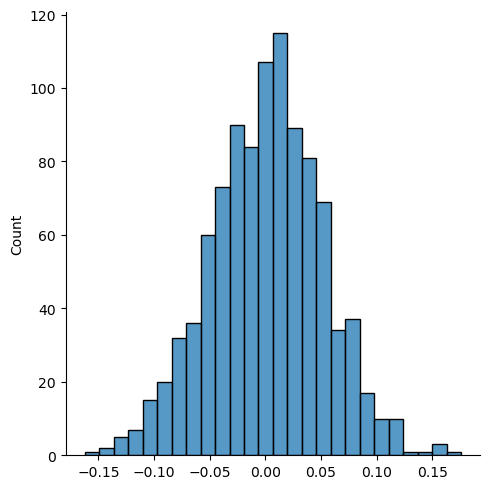

In [25]:
sns.displot(dados_normal)

In [29]:
# Random Uniform
uniform = initializers.RandomUniform()
dados_uniform = uniform(shape=[1000])

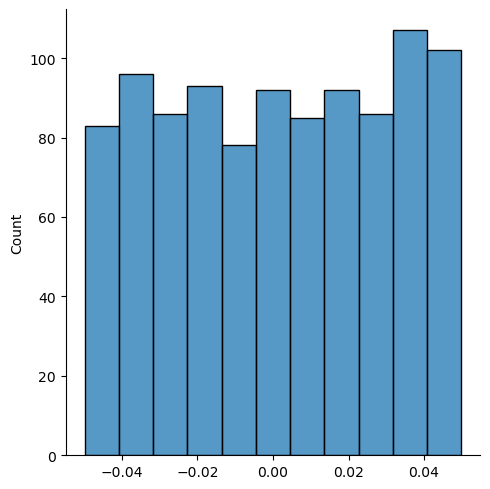

In [31]:
sns.displot(dados_uniform)

In [41]:
# Glorot normal (Xavier Initialization) 
# stddev = sqrt(2/(fan_in + fan_out))   fan_in = Número de neurônios de entrada fan_out = número de neurônios de saída
# 10 -> 100 -> 100 -> 1
math.sqrt(2 / (10 + 100))
math.sqrt(2 / (100 + 100))
math.sqrt(2 / (100 + 1))

0.14071950894605836

In [43]:
normal_glorot = initializers.GlorotNormal()
dados_normal_glorot = normal_glorot(shape=[1000])

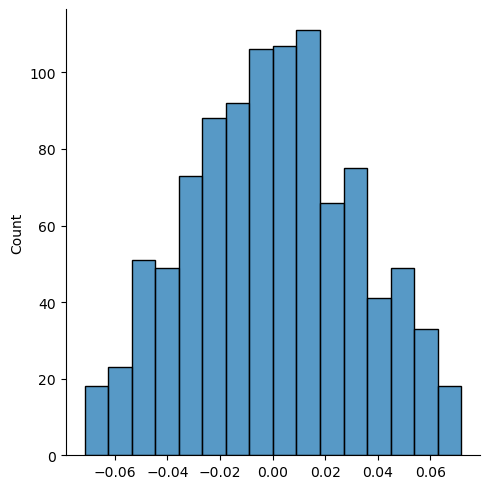

In [45]:
sns.displot(dados_normal_glorot)

In [47]:
uniform_glorot = initializers.GlorotUniform()
dados_uniform_glorot = uniform_glorot(shape=[1000])

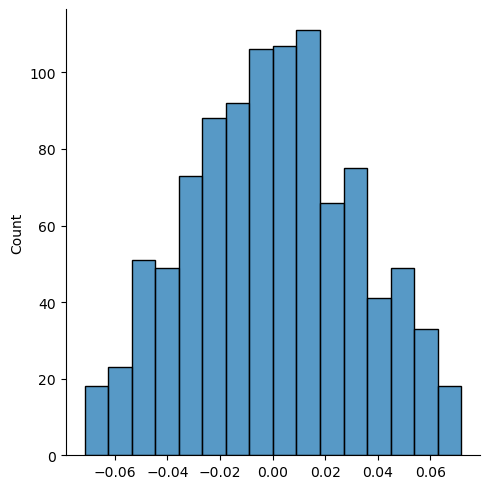

In [49]:
sns.displot(dados_normal_glorot)

In [51]:
3.2874783748374e-18
2.32132131231232+00

3.2874783748374e-18